# Muestreo de sistemas con retardo

- Obtener el sistema discreto que se observa al muestrear con ZOH un doble integrador con retardo $t_d<T$ 
- ¿Qué ocurre cuando  $t_d = (d-1)*T + t_d'$ ?

In [38]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

Matriz de transición de estado Phi:


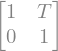

Gamma1:


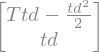

Gamma0:


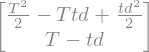

In [47]:
# Inicialización
sp.init_printing()
t, tau, T, td = sp.symbols('t tau T td', real=True)

eAt = sp.Matrix([[1, t],[0, 1]])  
Phi = eAt.subs({t: T})  # Matriz de transición de estado para el sistema continuo
B = np.array([[0], [1]])  # Matriz de entrada para el sistema continuo
print("Matriz de transición de estado Phi:")
display(Phi)


Gamma1 = sp.integrate(
    eAt.subs({t:T-tau}), 
    (tau, 0, td))*B  # Matriz de entrada para el sistema continuo

print("Gamma1:")
display(Gamma1)

Gamma0 = sp.integrate(
    eAt.subs({t:T-tau}), 
    (tau, td, T))*B  # Matriz de entrada para el sistema continuo
print("Gamma0:")
display(Gamma0)



In [48]:
# Obtengo el modelo numérico
T_n = 0.1
td_n = 0.05
aa = Phi.subs({T: T_n, td: td_n}).evalf()
print(aa)

Phi_n = np.block([
    [Phi.subs({T: T_n, td: td_n}).evalf(), Gamma1.subs({T: T_n, td: td_n}).evalf()],
    [np.zeros((1, 2)), 0]
    ])

B_n = np.block([
    [Gamma0.subs({T: T_n, td: td_n}).evalf()],
    [1]
    ])

C_n = np.array([[1, 0, 0]])

Gd = ctl.ss(Phi_n, B_n, C_n, 0, T_n)
print("Sistema discreto con retardo:")
display(Gd)

# Recordemos que el sistema continuo es un doble integrador
G = ctl.ss([[0, 1], [0, 0]],[[0], [1]], [[1, 0]], [[0]])
print("Sistema continuo sin retardo:")
display(G)


Matrix([[1.00000000000000, 0.100000000000000], [0, 1.00000000000000]])
Sistema discreto con retardo:


<LinearIOSystem:sys[16]:['u[0]']->['y[0]']>

Sistema continuo sin retardo:


<LinearIOSystem:sys[17]:['u[0]']->['y[0]']>

Muestreo cada 50.0 samples


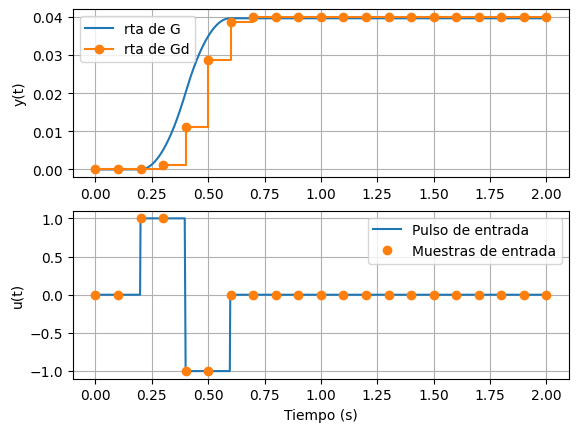

In [53]:
# Respuesta al pulso de un doble integrador con retardo
t_n = np.linspace(0, 2, 1001)
u = np.zeros_like(t_n)
u[100:199] = 1  # Pulso unitario entre t=1
u[200:299] = -1  # Pulso unitario entre t=1


N = T_n/(t_n[1]-t_n[0])
print(f'Muestreo cada {N} samples')

uk = u[0:len(u):int(N)]  # Muestreo cada 10 muestras

# Respuesta al pulso
t_c, y_c = ctl.forced_response(G, t_n, U=u)
t_k, y_k = ctl.forced_response(Gd, U=uk)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_c, y_c, label='rta de G')
plt.step(t_k, y_k, 'o-',where='post',label='rta de Gd')
plt.ylabel('y(t)')
plt.grid()
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t_c, u, label='Pulso de entrada')
plt.step(t_k, uk, 'o',  where='post',label='Muestras de entrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('u(t)')
plt.grid()
plt.legend()